In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lgca import get_lgca
from itertools import product
import pickle as pkl
import diptest as dt
PATH = '.\\data\\gog\\nonlocaldensity_10reps\\'
parameters = np.load(PATH+'params.npz', allow_pickle=True)

constparams = parameters['constparams'].item()
r_ds = parameters['r_ds']
thetas = parameters['thetas']
reps = 10
# data = np.load(PATH+'n_pr.npy', allow_pickle=True)

In [2]:
kappas_r_t = [[[] for _ in range(len(thetas))] for _ in range(len(r_ds))]
for index in product(np.arange(0, len(r_ds)), np.arange(0, len(thetas))):
    for i in range(reps):
        with open(PATH+'data{}.pkl'.format(index+(i, 0,)), 'rb') as f:
            d = pkl.load(f)
        kappas_r_t[index[0]][index[1]].extend(list(d['kappa'][d['nodes_t'].sum()]))

In [3]:
pvals = np.array([[dt.diptest(np.array(kappas_r_t[i][j]))[1] for j in range(len(thetas))] for i in range(len(r_ds))])

In [4]:
from scipy.stats import skew, kurtosis
from sklearn.mixture import GaussianMixture

In [5]:
# calculate bimodality coefficent
# calculate skewness
def bc(x):
    sk = skew(x)
    k = kurtosis(x, fisher=False)
    n = len(x)
    return (sk**2 + 1) / (k + 3 * ((n - 1)**2 / ((n - 2) * (n - 3))))

In [6]:
def aic_diff(x):
    f1 = GaussianMixture(n_components=1).fit(x[:, np.newaxis])
    f2 = GaussianMixture(n_components=2).fit(x[:, np.newaxis])
    aic1 = f1.aic(x[:, np.newaxis])
    aic2 = f2.aic(x[:, np.newaxis])
    return (aic1 - aic2) / max(aic1, aic2)

In [7]:
kurt = np.array([[kurtosis(np.array(kappas_r_t[i][j]), fisher=False, bias=False) for j in range(len(thetas))] for i in range(len(r_ds))])

In [8]:
bcs = np.array([[bc(np.array(kappas_r_t[i][j])) for j in range(len(thetas))] for i in range(len(r_ds))])

In [9]:
aic = np.array([[aic_diff(np.array(kappas_r_t[i][j])) for j in range(len(thetas))] for i in range(len(r_ds))])

In [37]:
med = np.array([[np.median(np.array(kappas_r_t[i][j])) for j in range(len(thetas))] for i in range(len(r_ds))])
meankappa = np.array([[np.mean(np.array(kappas_r_t[i][j])) for j in range(len(thetas))] for i in range(len(r_ds))])

In [11]:
skewness = np.array([[skew(np.array(kappas_r_t[i][j]), bias=False) for j in range(len(thetas))] for i in range(len(r_ds))])

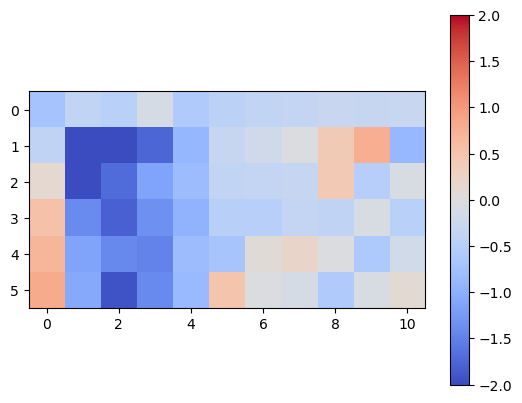

In [12]:
plt.imshow(skewness, cmap='coolwarm', aspect='equal', vmax=2, vmin=-2)
plt.colorbar()
plt.show()

In [112]:
# plt.imshow(pvals, cmap='gray', aspect='equal')
# plt.colorbar()

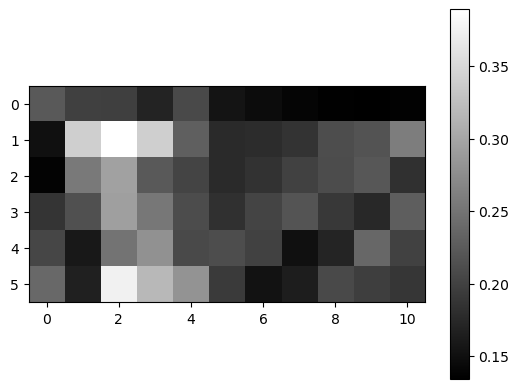

In [14]:
plt.imshow(bcs, cmap='gray', aspect='equal')
plt.colorbar()

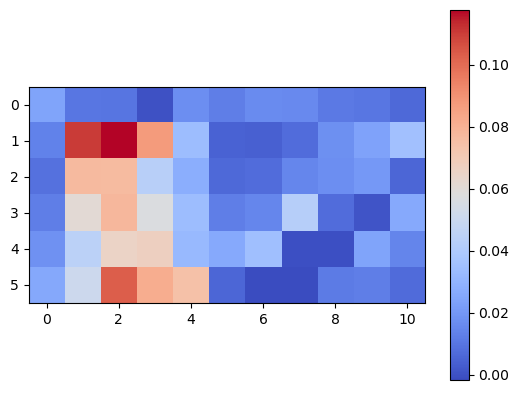

In [15]:
plt.imshow(aic, cmap='coolwarm', aspect='equal')
plt.colorbar()

In [111]:
# plt.imshow(aic> 0, cmap='gray', aspect='equal')
# plt.colorbar()

In [24]:
dtheta = (thetas[1] - thetas[0]) / 2
dr_ds = (r_ds[1] - r_ds[0]) / 2

In [45]:
r_ds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25])

In [79]:
from matplotlib.lines import Line2D
import os
style_path = os.path.abspath('./frontiers_style.mplstyle')
plt.style.use(style_path)

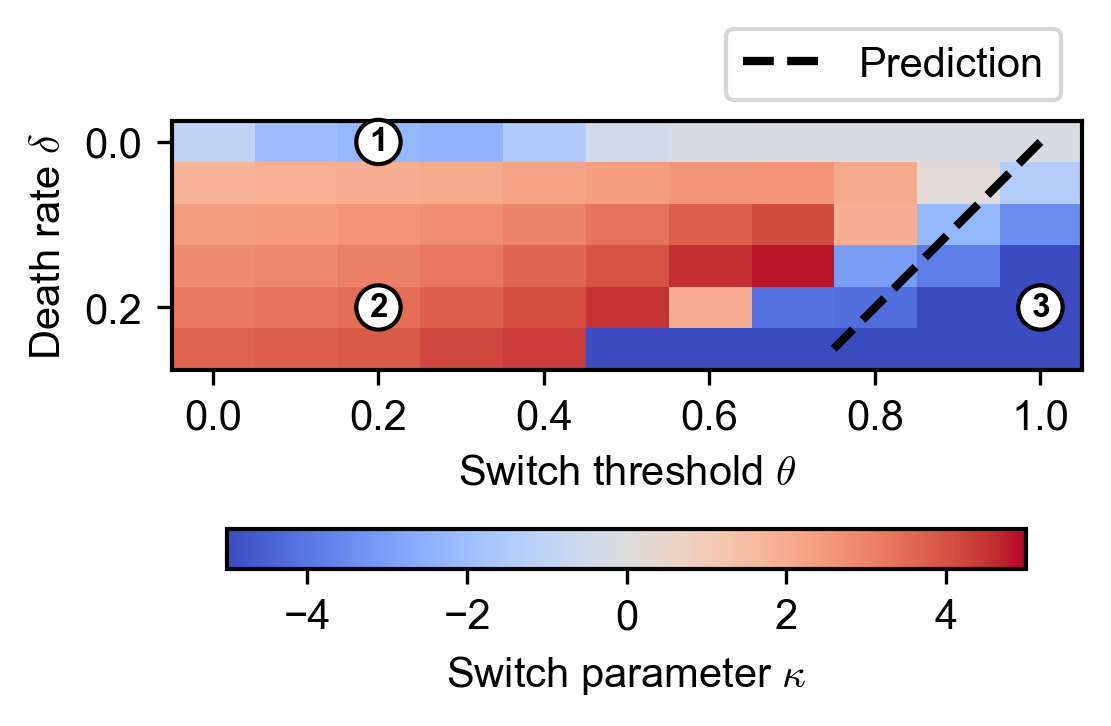

In [115]:
# Create a figure using the style
fig, ax = plt.subplots()
# Get the current figure size
fig_width, fig_height = fig.get_size_inches()

bbox_attr = dict(boxstyle='circle,pad=0.2', edgecolor='black', facecolor='white', linewidth=1)

# Set the new figure size by multiplying it by the scale factor
scale_factor = 0.7
fig.set_size_inches(fig_width * scale_factor, fig_height)
extent = [thetas[0]-dtheta, thetas[-1]+dtheta, r_ds[-1]+dr_ds, r_ds[0]-dr_ds]
plt.imshow(med, cmap='coolwarm', aspect='equal', extent=extent, vmin=-5, vmax=5, interpolation='none')
# place colorbar at bottom of image
plt.colorbar(label=r'Switch parameter ${\kappa}$', pad=0.2, fraction=0.05, orientation='horizontal')
plt.xlabel(r'Switch threshold $\theta$')
plt.ylabel(r'Death rate $\delta$')
plt.text(0.2, 0., '1', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(0.2, 0.2, '2', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(1., 0.2, '3', fontsize=8, weight='bold', bbox=bbox_attr,
        ha='center',
        va='center',
         )
contour = plt.contour(thetas, r_ds, 1 - np.array(r_ds)[:, np.newaxis] - np.array(thetas)[np.newaxis, :], levels=[0], colors='k', linestyles='dashed', extent=extent, origin='upper')
# custom_line = Line2D([0], [0], color='k', linestyle='dashed', label=r'$\rho_{\mathcal{N}}^{\max} - \theta = 0$')
custom_line = Line2D([0], [0], color='k', linestyle='dashed', label='Prediction')
plt.legend(handles=[custom_line], loc='lower right', bbox_to_anchor=(1, 1))
plt.savefig('evolutionary_regimes.svg', bbox_inches='tight')
plt.savefig('evolutionary_regimes.pdf', bbox_inches='tight')

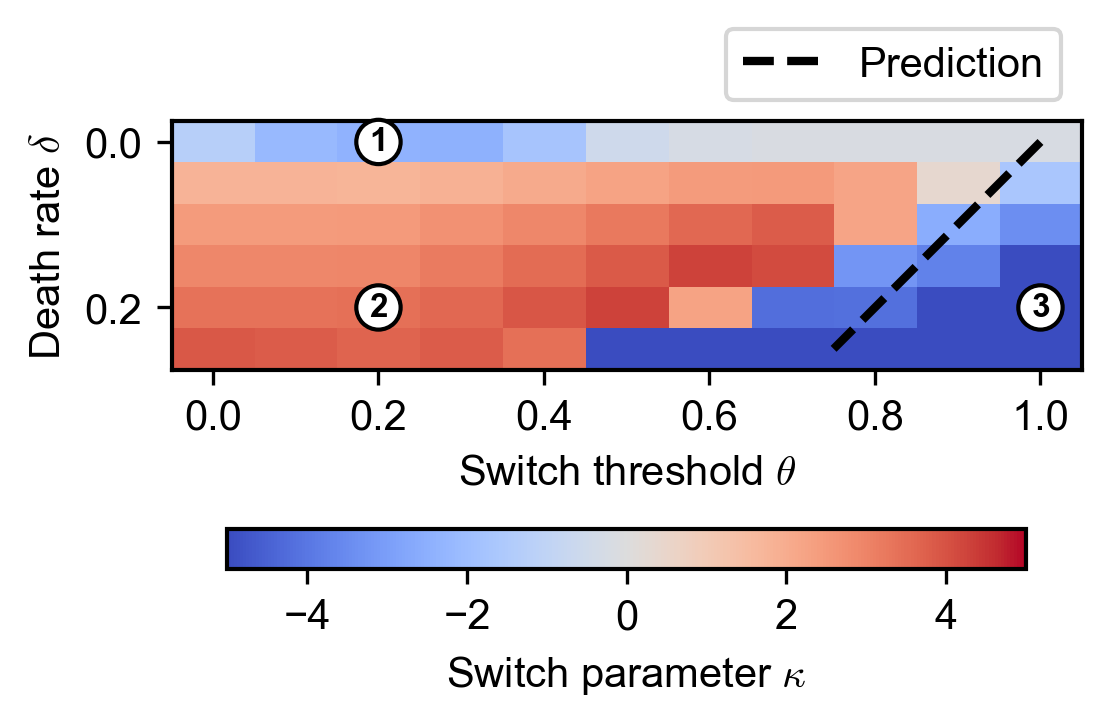

In [114]:
# Create a figure using the style
fig, ax = plt.subplots()
# Get the current figure size
fig_width, fig_height = fig.get_size_inches()

bbox_attr = dict(boxstyle='circle,pad=0.2', edgecolor='black', facecolor='white', linewidth=1)

# Set the new figure size by multiplying it by the scale factor
scale_factor = 0.7
fig.set_size_inches(fig_width * scale_factor, fig_height)
extent = [thetas[0]-dtheta, thetas[-1]+dtheta, r_ds[-1]+dr_ds, r_ds[0]-dr_ds]
plt.imshow(meankappa, cmap='coolwarm', aspect='equal', extent=extent, vmin=-5, vmax=5, interpolation='none')
# place colorbar at bottom of image
plt.colorbar(label=r'Switch parameter ${\kappa}$', pad=0.2, fraction=0.05, orientation='horizontal')
plt.xlabel(r'Switch threshold $\theta$')
plt.ylabel(r'Death rate $\delta$')
plt.text(0.2, 0., '1', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(0.2, 0.2, '2', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(1., 0.2, '3', fontsize=8, weight='bold', bbox=bbox_attr,
        ha='center',
        va='center',
         )
contour = plt.contour(thetas, r_ds, 1 - np.array(r_ds)[:, np.newaxis] - np.array(thetas)[np.newaxis, :], levels=[0], colors='k', linestyles='dashed', extent=extent, origin='upper')
# custom_line = Line2D([0], [0], color='k', linestyle='dashed', label=r'$\rho_{\mathcal{N}}^{\max} - \theta = 0$')
custom_line = Line2D([0], [0], color='k', linestyle='dashed', label='Prediction')
plt.legend(handles=[custom_line], loc='lower right', bbox_to_anchor=(1, 1))
# plt.savefig('evolutionary_regimes.svg', bbox_inches='tight')
# plt.savefig('evolutionary_regimes.pdf', bbox_inches='tight')